# 1. Business Problem

# 1.1 Problem Context
Our client is a large Real Estate Investment Trust (REIT).

They invest in houses, apartments, and condos(complex of buildings) within a small county in New York state.
As part of their business, they try to predict the fair transaction price of a property before it's sold.
They do so to calibrate their internal pricing models and keep a pulse on the market.

# 1.2 Problem Statement
The REIT has hired us to find a data-driven approach to valuing properties.

They currently have an untapped dataset of transaction prices for previous properties on the market.
The data was collected in 2016.
Our task is to build a real-estate pricing model using that dataset.
If we can build a model to predict transaction prices with an average error of under US Dollars 70,000, then our client will be very satisfied with the our resultant model.

# 1.3 Business Objectives and Constraints

Deliverable: Trained model file
Win condition: Avg. prediction error < \$70,000
Model Interpretability will be useful
No latency requirement


# 2.1 Data Overview

For this project:

The dataset has 1883 observations in the county where the REIT operates.
Each observation is for the transaction of one property only.
Each transaction was between \$200,000 and \$800,000.
Target Variable
'tx_price' - Transaction price in USD
Features of the data:
Public records:

'tx_year' - Year the transaction took place
'property_tax' - Monthly property tax
'insurance' - Cost of monthly homeowner's insurance
Property characteristics:

'beds' - Number of bedrooms
'baths' - Number of bathrooms
'sqft' - Total floor area in squared feet
'lot_size' - Total outside area in squared feet
'year_built' - Year property was built
'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile
'basement' - Does the property have a basement?
'exterior_walls' - The material used for constructing walls of the house
'roof' - The material used for constructing the roof
Location convenience scores:

'restaurants' - Number of restaurants within 1 mile
'groceries' - Number of grocery stores within 1 mile
'nightlife' - Number of nightlife venues within 1 mile
'cafes' - Number of cafes within 1 mile
'shopping' - Number of stores within 1 mile
'arts_entertainment' - Number of arts and entertainment venues within 1 mile
'beauty_spas' - Number of beauty and spa locations within 1 mile
'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile
Neighborhood demographics:

'median_age' - Median age of the neighborhood
'married' - Percent of neighborhood who are married
'college_grad' - Percent of neighborhood who graduated college
Schools:

'num_schools' - Number of public schools within district
'median_school' - Median score of the public schools within district, on the range 1 - 10

2.2 Mapping business problem to ML problem

2.2.1 Type of Machine Learning Problem
It is a regression problem, where given the above set of features, we need to predict the transaction price of the house.

2.2.2 Performance Metric (KPI)
Since it is a regression problem, we will use the following regression metrics:

2.2.2.1 Root Mean Squared Error (RMSE)
title

2.2.2.2 R-squared
title

Just remember the value of R suared must be at least greater than 0 and 1 in the best case

2.2.2.3 Mean Absolute Error (MAE):
title

Remember, our win-condition for this project is predicting within \$70,000 of true transaction prices, on average.
Mean absolute error (or MAE) is the average absolute difference between predicted and actual values for our target variable. That exactly aligns with the terms of our win condition!
So we're aiming to get MAE below 70,000
Train-Test Splits
80-20

Exploratory data analysis


#  IMPORT THE LIBRARIES

In [5]:
#for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae



In [6]:
np.set_printoptions(precision=2, suppress=True) #for printing floating point numbers upto  precision 2

In [8]:
df = pd.read_csv('real_estate_data.csv')
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [9]:
df.shape

(1883, 26)

In [10]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

In [11]:
pd.set_option('display.max_columns', 20) ## display max 20 columns
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [12]:
df.dtypes[df.dtypes=='object']

property_type     object
exterior_walls    object
roof              object
dtype: object

#  DISTRIBUTIONS OF NUMERIC FEATURES

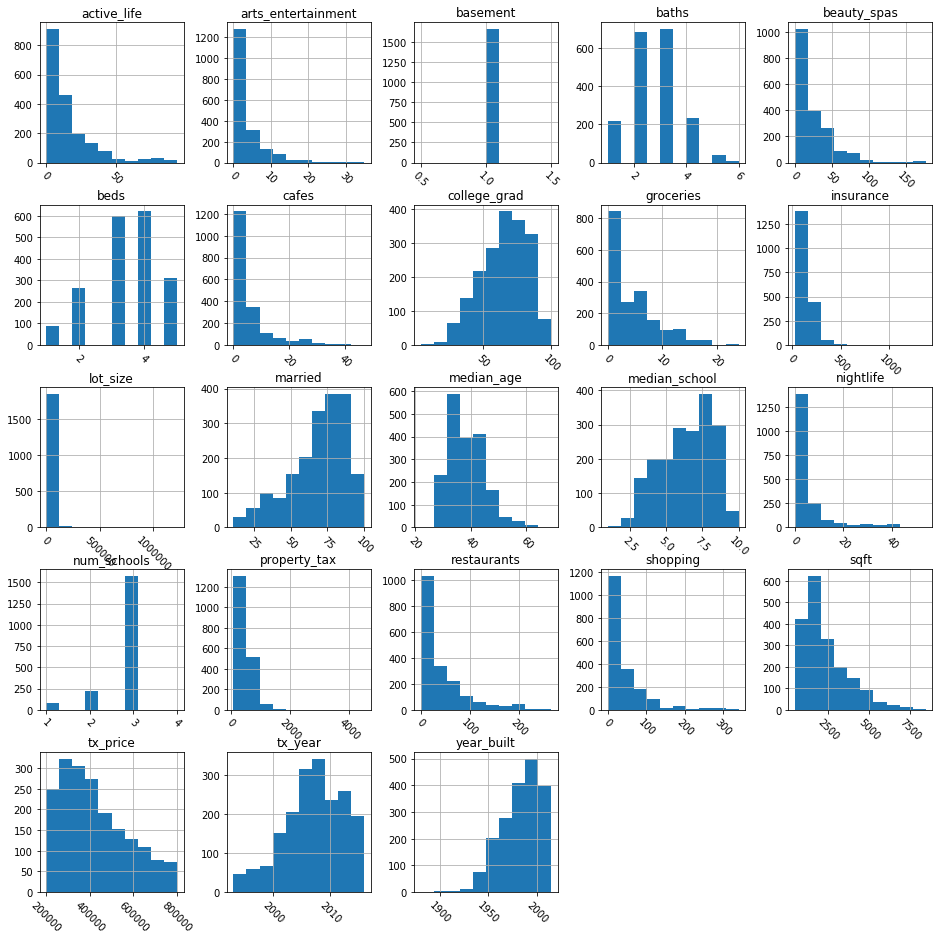

In [13]:
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

# OBSERVATIONS :  We can make out quite a few observations:

For example, consider the histogram for num_schools:

1.) More than 1500 houses have 3 schools with a mile
Consider the histogram for sqft:

2.) More than 400 houses have area within 2000 sqft
3.) Very few houses have area more than 5000 sqft

Consider the histogram for beds:

4.) Over 600 houses have 4 bedrooms, and similar number of houses have 3 bedrooms.
 5.) Less than 100 houses have one bedroom and so on.
 6.) Also, look at the plot for the 'year_built' feature:

The last bin in the histogram represents the range 2010-2020.

7.) Since this dataset was pulled in 2016, we should not have properties built in 2019.
8.) A property built after 2016 would be a measurement error.
9.) However, because of the 10-year bins, it's hard to tell if there's a measurement error just from the plot above.

Display summary statistics for the numerical features.

In [14]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,...,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,...,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,...,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,...,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,...,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,...,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


# OBSERVATION

 Look at the 'year_built' column, we can see that its max value is 2015.
 
The 'basement' feature has some missing values, also its standard deviation is 0.0, while its min and max are both 1.0. Maybe this is a feature that should be binary consisting values 0 and 1.

# DISTRIBUTION OF CATEGORICAL FEATURES

Display summary statistics for categorical features.

In [15]:
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


# OBSERVATION: 
'exterior_walls' and 'roof' have missing values
There are 16 unique classes for 'exterior_walls' and 'roof'
The most frequent element for exterior_walls is 'Brick'and it has come 687 times.

# BAR PLOTS FOR CATEGORICAL FEATURES
Plot bar plot for the 'exterior_walls' feature.

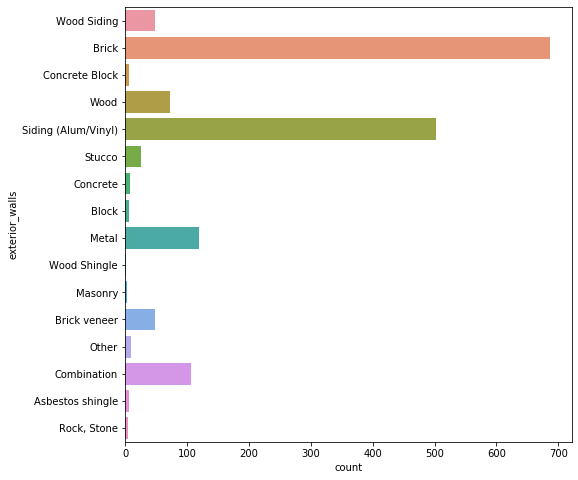

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(y='exterior_walls', data=df)

# OBSERVATION:
Several classes are quite prevalent in the dataset. They have long bars. Those include:

'Brick' shows count of 687 as we get in features and is most frequent
'Siding (Alum/Vinyl)'
'Metal'
'Combination'
Some classes have really short bars. For example:

'Concrete Block'
'Concrete'
'Block'
'Wood Shingle'
others
These don't have many observations, and they are called sparse classes.
Similarly Plot bar plot for the 'roof' feature.

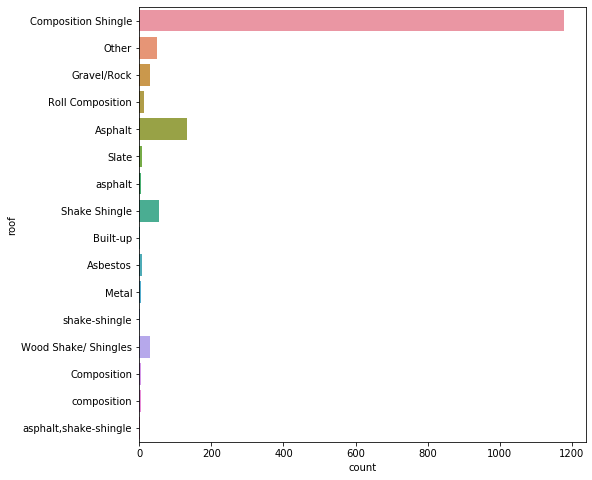

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(y='roof', data=df)

# OBSERVATION:
Property_type having single family has maximum count greater than 1000
There is no sparse class in property_type

# SPARSE CLASSES
Sparse classes are classes in categorical features that have a very small number of observations.

They tend to be problematic when we get to building models.

In the best case, they don't influence the model much.
In the worst case, they can cause the model to be overfit.
Let's make a mental note to combine or reassign some of these classes later.

From the above bar plots:

# OBSERVATION : 
In both 'exterior_walls' and 'roof' as well we have many sparse classes

# SEGMENTATION:

Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

Segmenting the target variable by key categorical features

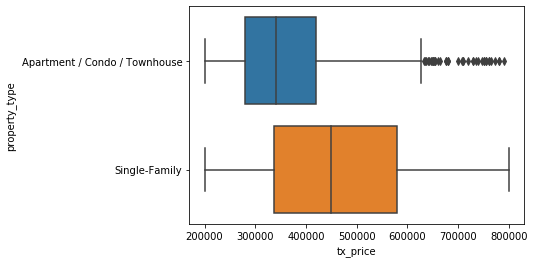

In [18]:
sns.boxplot(y='property_type', x='tx_price', data=df)

# OBSERVATIONS:
In general, it looks like single family homes are more expensive.

Let's compare the two property types across other features as well

In [19]:
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,...,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,...,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


#  OBSERVATIONS:
Property having single-family is larger in sqft area.It also has more bedrooms than other property-type.

Apartment/townhouse has larger lots than the property having single-family.

Apartmenr/condo/Townhouse type of property is in areas with more restaurants,nightlife options,more grocery stores,shopping stores,active_life(gym,sports,yoga studios)

Property_type such as apartments,Condo,Townhouse is more crowded and so have more fascilities but smaller in sqft area so have lesser price whereas property-type having single-family are generally large in size and has lesser fascilities as less crowded.

Segment 'sqft' by 'property_type' and plot the boxplots.

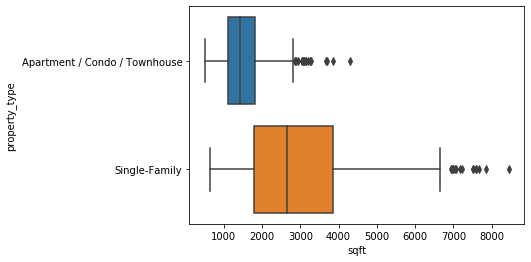

In [20]:
sns.boxplot(y='property_type', x='sqft', data=df)

In [21]:
df.groupby('property_type').agg([np.mean, np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             ...  \
                                       std         mean        std  ...   
property_type                                                       ...   
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640  ...   
Single-Family                  1422.871169  1978.523148  22.210582  ...   

                              property_tax               insurance             \
                                      mean         std        mean        std   
property_type                                                                   
Apartment / Condo / Townhouse   346.261519  142.292282  105.652553  47.118015   
Single-Family                   556.383333  244.351559  166.329630  77.816022   

                              median_school           num_schools            \
                                       mean       std        mean       std   
property_type                                                                 
Apartment / Condo / Townhouse      6.382316  1.941998    2.831880  0.455370   
Single-Family                      6.592593  2.031663    2.764815  0.537959   

                                   tx_year            
                                      mean       std  
property_type                                         
Apartment / Condo / Townhouse  2007.941469  4.099487  
Single-Family                  2006.494444  5.807059  

[2 rows x 46 columns]

# CO-RELATIONS:

1.) Finally, let's take a look at the relationships between numeric features and other numeric features.
2.) Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.
3.) Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
4.) Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of           parties attended.

5.) Correlations near -1 or 1 indicate a strong relationship.
6.) Those closer to 0 indicate a weak relationship.
7.) 0 indicates no relationship.


In [22]:
df.corr()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,...,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,...,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,...,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,...,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,...,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,...,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,...,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,...,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,...,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


# A lot of numbers make things difficult to read. So let's visualize this.

But first, it's important to notice that the correlations for 'basement' all show as NaN. This is expected because right now that feature doesn't vary at all (its standard deviation is 0), as we saw all the way back in step 2. We'll fix this later.

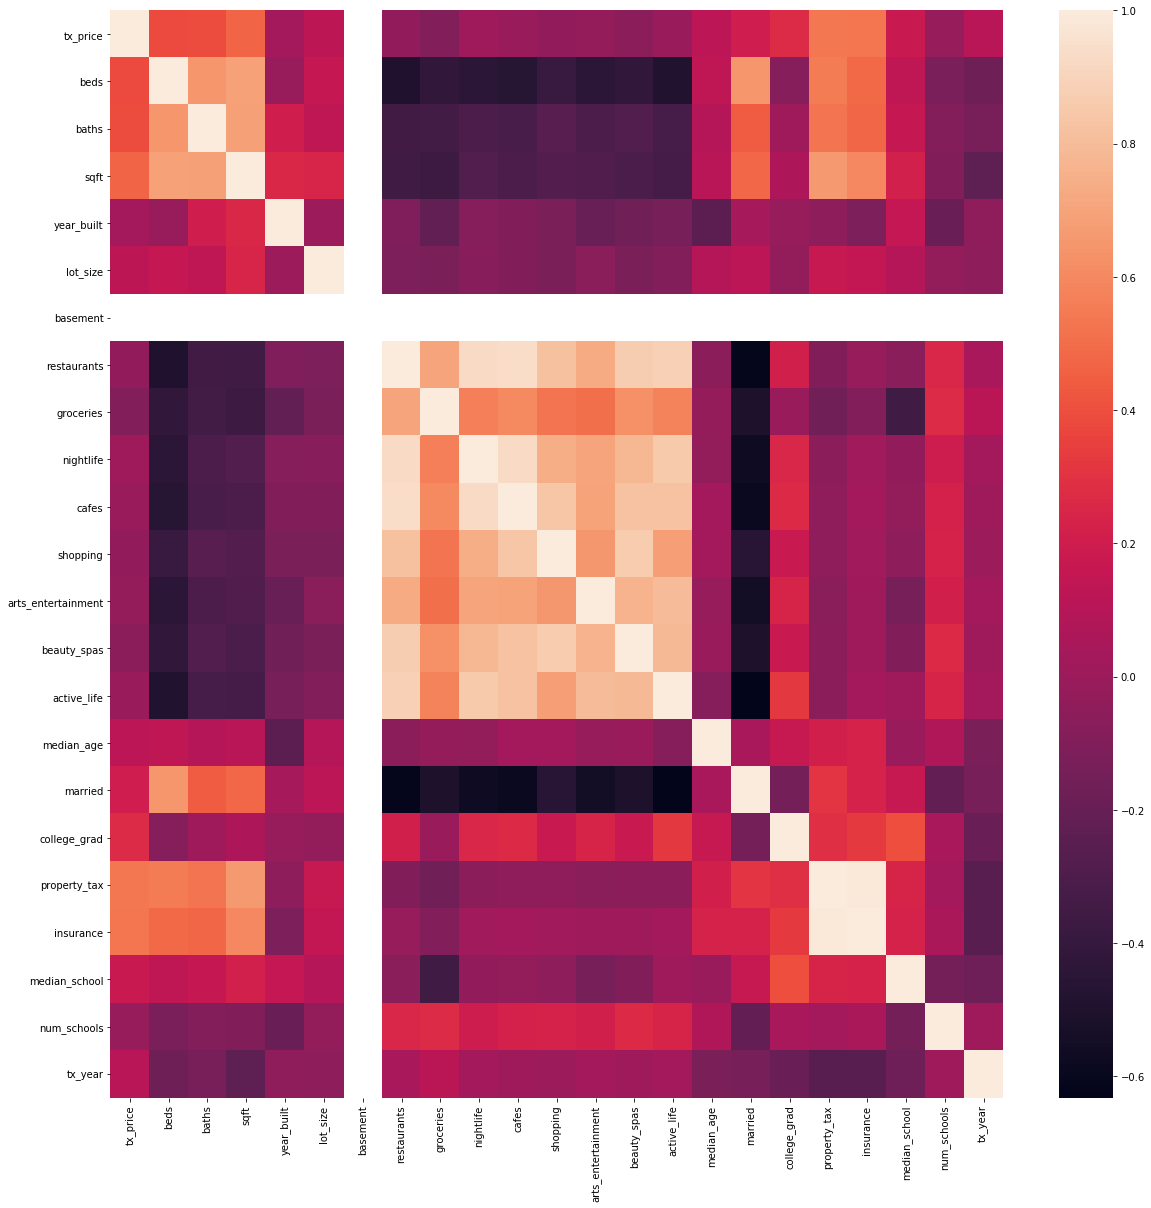

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

# What to look for?
1.) The colorbar on the right explains the meaning of the heatmap - Dark colors indicate strong negative correlations and light colors indicate strong positive correlations.

2.) Perhaps the most helpful way to interpret this correlation heatmap is to first find features that are correlated with our target variable by scanning the first column.

3.) In this case, it doesn't look like many features are strongly correlated with the target variable.

4.) Example: there is a strong negative correlation between beds and restaurants, or gloceries and median_schools.

There is a weak positive correlation between 'tx_price' and 'property_tax'.

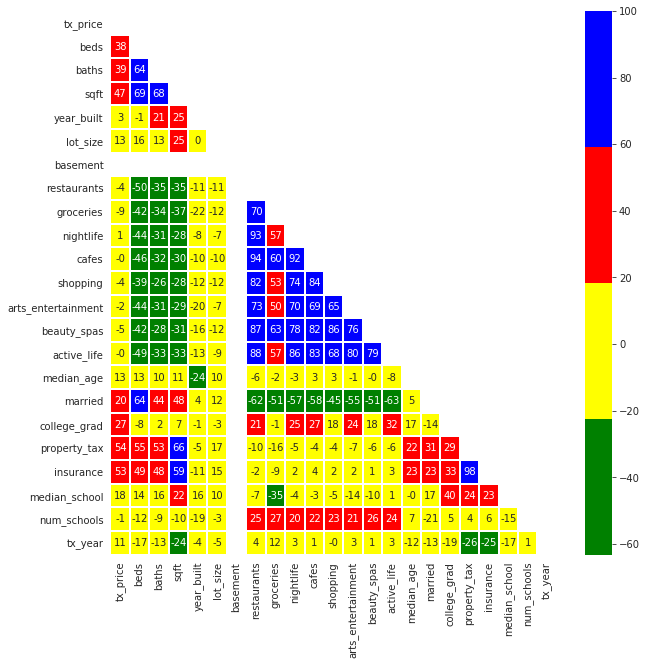

In [24]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

#  DATA CLEANING

# DROPPING THE DUPLICATES (DE-DUPLICATION)

In [25]:
df = df.drop_duplicates()
print( df.shape )

(1883, 26)


#  FIX STRUCTURAL ERRORS :
The basement feature has some nan values, to handle them

In [26]:
df.basement.unique()

array([nan,  1.])

In [28]:
df.basement.fillna(0, inplace=True)
df.basement.unique()

array([0., 1.])

#  TYPOS AND CAPITIALIZATION

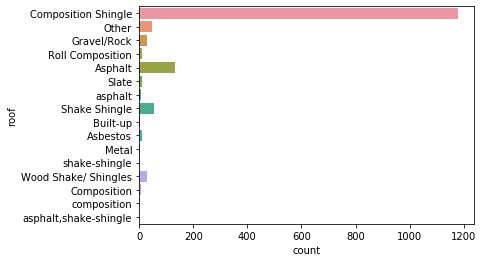

In [29]:
sns.countplot(y='roof', data=df)

# Using this plot, we can easily catch typos and inconsistent capitalization. For   example:

'composition' should be 'Composition'
'asphalt' should be 'Asphalt'
'shake-shingle' should be 'Shake Shingle'
'asphalt,shake-shingle' could probably just be 'Shake Shingle'

In [30]:
df.roof.replace('composition', 'Composition', inplace=True)
df.roof.replace('asphalt', 'Asphalt', inplace=True)
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

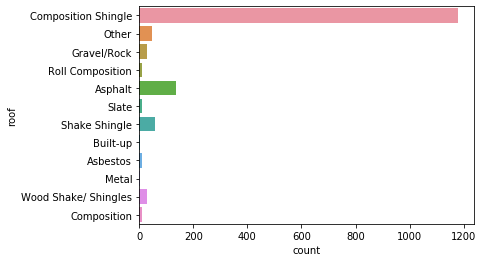

In [31]:
sns.countplot(y='roof', data=df)

# MISLABELED CLASSES:

Finally, we'll check for classes that are labeled as separate classes when they should really be the same.

e.g. If 'N/A' and 'Not Applicable' appear as two separate classes, we should combine them.
let's plot the class distributions for 'exterior_walls':

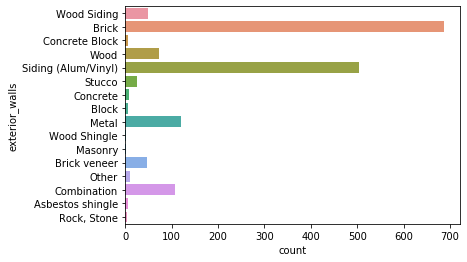

In [32]:
sns.countplot(y='exterior_walls', data=df)

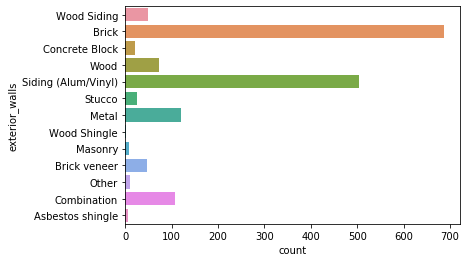

In [33]:
df.exterior_walls.replace(['Rock, Stone'], 'Masonry', inplace=True)
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)
sns.countplot(y='exterior_walls', data=df)

# REMOVING OUTLIERS:
1.) Outliers can cause problems with certain types of models.
2.) Boxplots are a nice way to detect outliers
3.) Let's start with a box plot of your target variable, since that's what you're actually trying to predict.

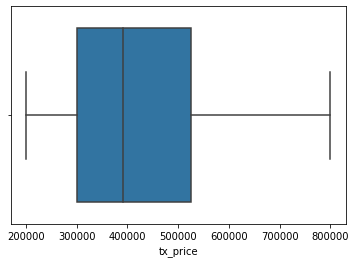

In [34]:
sns.boxplot(df.tx_price)

# INTERPRETATION:
1.) The two vertical bars on the ends are the min and max values. All properties sold for between \$200,000 and \$800,000.
2.) The box in the middle is the interquartile range (25th percentile to 75th percentile).
3.) Half of all observations fall in that box.
4.) Finally, the vertical bar in the middle of the box is the median.

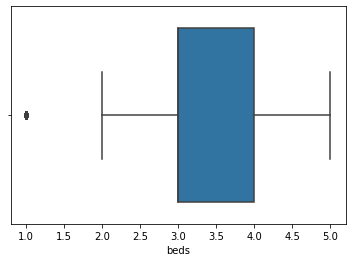

In [35]:
sns.boxplot(df.beds)

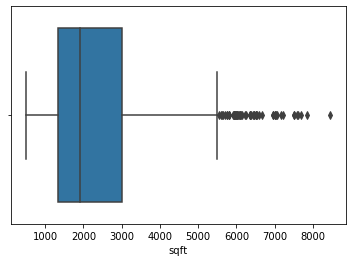

In [37]:
sns.boxplot(df.sqft)

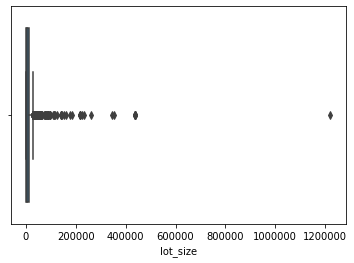

In [38]:
sns.boxplot(df.lot_size)

In [39]:
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our ability to model normal size properties.

In [40]:
df = df[df.lot_size <= 500000]
df.shape

(1882, 26)

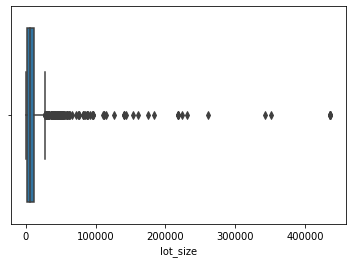

In [41]:
sns.boxplot(df.lot_size)

# LABEL  MISSING CATEGORICAL  DATA :
You cannot simply ignore missing values in your dataset. You must handle them in some way for the very practical reason that Scikit-Learn algorithms do not accept missing values.

In [42]:
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

#  The best way to handle missing data for categorical features is to simply label them as 'Missing

In [43]:
df['exterior_walls'] = df['exterior_walls'].fillna('Missing')
df['roof'] = df['roof'].fillna('Missing')
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

# 4.7 Flag and fill missing numeric data

In [44]:
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

#  Well, it looks like we don't have any numerical features with missing values in this dataset.

Before we move on to the next module, let's save the new dataframe we worked hard to clean.
This makes sure we don't have to re-do all the cleaning after clossing the session

In [47]:
df.to_csv('cleaned_df.csv', index=None)

# Feature Engineering 

# Indicator variables:

1.) For example, let's say you knew that homes with 2 bedrooms and 2 bathrooms are especially popular for investors.
2.) Maybe you suspect these types of properties command premium prices. (You don't need to know for sure.)
3.) Create an indicator variable to flag properties with 2 beds and 2 baths and name it 'two_and_two'.

In [48]:
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [49]:
df[df['two_and_two']==1].shape[0]/df.shape[0]

0.09458023379383634

In [50]:
df['old_properties'] = (df.year_built < 1980) .astype(int)

In [51]:
df[df['old_properties']==1].shape[0]/df.shape[0]

0.3783209351753454

In [52]:
df['tax_and_insurance'] = df.property_tax + df.insurance

In [54]:

df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)
df[df['during_recession']==1].shape[0]/df.shape[0]

0.2635494155154091

# INTERACTION FEATURES

In [55]:
df['property_age'] = df.tx_year - df.year_built

In [56]:
print(df.property_age.min())

-8


In [57]:
print(sum(df.property_age < 0))

19


In [58]:
df['school_score'] = df.num_schools * df.median_school

In [59]:
df.school_score.median()

18.0

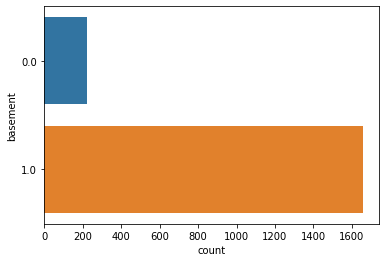

In [60]:
sns.countplot(y='basement', data=df)

In [61]:
df = df.drop(['basement'], axis=1)

In [62]:
df = df.drop(['nightlife'], axis=1)

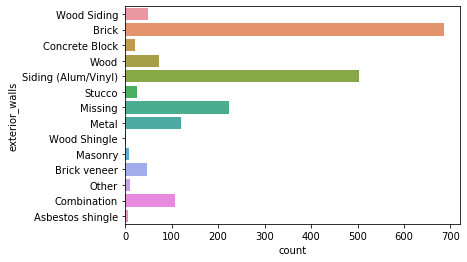

In [63]:
sns.countplot(y='exterior_walls', data=df)

In [64]:
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle', 'Wood'], 'Wood', inplace=True)

In [65]:
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

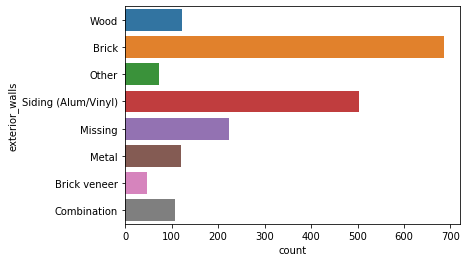

In [66]:
sns.countplot(y='exterior_walls', data=df)

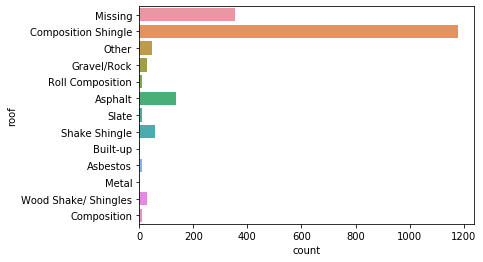

In [67]:
sns.countplot(y='roof', data=df)

In [68]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

In [69]:
other_roof = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']
df.roof.replace(other_roof, 'Other', inplace=True)

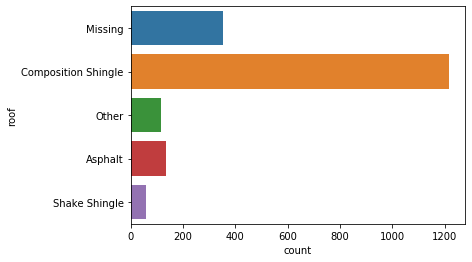

In [70]:
sns.countplot(y='roof', data=df)

# Encode dummy variables (One Hot Encoding)

1.) Machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values.
2.) Therefore, we need to create dummy variables for our categorical features.
3.) Dummy variables are a set of binary (0 or 1) features that each represent a single class from a categorical feature.

In [71]:
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

In [72]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,restaurants,groceries,cafes,shopping,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,107,9,19,89,...,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,105,15,13,87,...,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,183,13,30,101,...,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,198,9,25,127,...,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,149,7,20,83,...,0,0,0,0,0,1,0,0,1,0


# Remove unused or redundant features
1.) Redundant features would typically be those that have been replaced by other features that you've added.
 2.) For example, since we used 'tx_year' and 'year_built' to create the 'property_age' feature, we might consider removing them.

In [73]:
df = df.drop(['tx_year', 'year_built'], axis=1)  ## axis=1 because we are dropping columns.

In [74]:
df = df.drop(['property_tax', 'insurance'], axis=1)  ## axis=1 because we are dropping columns.

In [76]:
df.to_csv('analytical_base_table.csv', index=None)

# Machine Learning Models

# Data Preparation :


In [78]:
df = pd.read_csv("analytical_base_table.csv")
print(df.shape)

(1882, 38)


In [81]:
y = df.tx_price
# Create separate object for input features
X = df.drop('tx_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1505, 37) (377, 37) (1505,) (377,)


#  Data standardization:

1.) In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.

2.) Thus we use mean and standard deviation of each feature.

3.) It is very important to save the mean and standard deviation for each of the feature from the training set, because we use the same mean and standard deviation in the test set.

In [82]:
train_mean = X_train.mean()
train_std = X_train.std()

In [83]:
X_train = (X_train - train_mean) / train_std

In [84]:

## Check for mean and std dev.
X_train.describe()

,beds,baths,sqft,lot_size,restaurants,groceries,cafes,shopping,arts_entertainment,beauty_spas,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,...,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03
mean,7.317882e-17,-1.698162e-16,-2.843794e-17,-9.564147e-17,4.060982e-17,-1.102108e-16,-2.703633e-17,-6.240855e-17,1.021700e-16,1.523329e-17,...,3.720538e-16,-4.545644e-16,-5.190385e-16,-1.873732e-16,2.314870e-16,3.214114e-16,-1.340382e-16,-2.841212e-16,3.688449e-17,-3.688449e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.278357e+00,-1.700286e+00,-1.397878e+00,-3.658072e-01,-8.617795e-01,-1.006920e+00,-7.148404e-01,-7.685499e-01,-7.341601e-01,-9.109111e-01,...,-1.928496e-01,-5.983855e-01,-2.652654e-01,-2.765629e-01,-1.373834e+00,-4.737337e-01,-2.536014e-01,-1.794840e-01,-8.598795e-01,-1.162181e+00
25%,-3.979472e-01,-6.255568e-01,-7.425305e-01,-3.193980e-01,-7.128605e-01,-7.860460e-01,-7.148404e-01,-6.381036e-01,-7.341601e-01,-7.564324e-01,...,-1.928496e-01,-5.983855e-01,-2.652654e-01,-2.765629e-01,-1.373834e+00,-4.737337e-01,-2.536014e-01,-1.794840e-01,-8.598795e-01,-1.162181e+00
50%,-3.979472e-01,4.491726e-01,-3.148626e-01,-1.875371e-01,-3.724742e-01,-3.442987e-01,-3.156932e-01,-3.585757e-01,-3.060660e-01,-3.316160e-01,...,-1.928496e-01,-5.983855e-01,-2.652654e-01,-2.765629e-01,7.274062e-01,-4.737337e-01,-2.536014e-01,-1.794840e-01,-8.598795e-01,8.598795e-01
75%,5.422577e-01,4.491726e-01,5.250893e-01,-1.925592e-02,3.721208e-01,5.391958e-01,2.165031e-01,1.818448e-01,3.360752e-01,4.407775e-01,...,-1.928496e-01,1.670053e+00,-2.652654e-01,-2.765629e-01,7.274062e-01,-4.737337e-01,-2.536014e-01,-1.794840e-01,1.162181e+00,8.598795e-01
max,1.482463e+00,3.673361e+00,4.058733e+00,1.249531e+01,4.797143e+00,4.294048e+00,5.538466e+00,5.567415e+00,6.757487e+00,5.924771e+00,...,5.181941e+00,1.670053e+00,3.767305e+00,3.613411e+00,7.274062e-01,2.109488e+00,3.940576e+00,5.567824e+00,1.162181e+00,8.598795e-01


In [85]:
X_test = (X_test - train_mean) / train_std

# MODEL 1 : BASE CLEANING:

In this model, for every test data point, we will simply predict the average of the train labels as the output.
We will use this simple model to perform hypothesis testing for other complex models.

In [86]:
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [87]:
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [89]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  151968.36226796627
Mean Absolute Error:  125668.10043156258


# Model-2 Ridge Regression


In [90]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [91]:
model.best_estimator_

Ridge(alpha=100)

In [92]:
y_train_pred = model.predict(X_train)

In [93]:
y_pred = model.predict(X_test)

In [95]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  118212.76364755096
Mean Absolute Error:  92217.39265606472


In [96]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  121496.81989648806
Mean Absolute Error:  93454.73872299674


# Feature Importance:


In [97]:
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100)

In [98]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
tax_and_insurance
sqft
college_grad
old_properties
property_age
baths
beauty_spas
beds
cafes
active_life
exterior_walls_Brick veneer
lot_size
groceries
exterior_walls_Missing
exterior_walls_Wood
during_recession
restaurants
property_type_Single-Family
property_type_Apartment / Condo / Townhouse
two_and_two
exterior_walls_Siding (Alum/Vinyl)
num_schools
exterior_walls_Brick
shopping
arts_entertainment
roof_Composition Shingle
roof_Missing
exterior_walls_Combination
roof_Other
median_school
married
median_age
roof_Shake Shingle
roof_Asphalt
school_score
exterior_walls_Other
exterior_walls_Metal


# Model-3 Support Vector Regression


In [99]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 20 minutes

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000, 100000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [100]:
model.best_estimator_

SVR(C=100000, gamma=0.01)

In [101]:
model = SVR(C=100000, gamma=0.01)
model.fit(X_train, y_train)


SVR(C=100000, gamma=0.01)

In [102]:
y_train_pred = model.predict(X_train)

In [103]:
y_pred = model.predict(X_test)

In [104]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  105435.78213451077
Mean Absolute Error:  76596.21601223336


In [105]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  110238.40921865054
Mean Absolute Error:  82284.35194060275


# Model-4 Random Forest Regression:


In [106]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [107]:
model.best_estimator_

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [108]:
y_train_pred = model.predict(X_train)

In [109]:
y_pred = model.predict(X_test)

In [110]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  65654.01098137208
Mean Absolute Error:  47918.67009880957


In [111]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  106711.38230750714
Mean Absolute Error:  78480.96786459783


# Feature Importance:

In [112]:
model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)

In [113]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
tax_and_insurance
property_age
sqft
lot_size
college_grad
married
median_age
during_recession
beauty_spas
active_life
shopping
restaurants
baths
groceries
median_school
arts_entertainment
school_score
beds
cafes
old_properties
exterior_walls_Missing
exterior_walls_Siding (Alum/Vinyl)
exterior_walls_Metal
roof_Composition Shingle
num_schools
exterior_walls_Brick
roof_Asphalt
exterior_walls_Other
roof_Missing
exterior_walls_Brick veneer
roof_Other
exterior_walls_Combination
roof_Shake Shingle
exterior_walls_Wood
property_type_Apartment / Condo / Townhouse
property_type_Single-Family
two_and_two


# Model-5 KN Regression

In [114]:
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 11.


In [115]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [116]:
y_train_pred = model.predict(X_train)

In [117]:
y_pred = model.predict(X_test)

In [118]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for KN Regression:
*******************************
Root mean squared error:  115680.58751125717
Mean Absolute Error:  91096.57299909394


In [119]:
print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))



Test Results for KN Regression:
*******************************
Root mean squared error:  120604.50985382473
R-squared:  0.3427586978735373
Mean Absolute Error:  95183.19025801784
